<a href="https://colab.research.google.com/github/gowtham26-prg/Predictive-Analytics/blob/House-pricing/House_pricing_using_XGBoostRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (2930, 82)
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condi

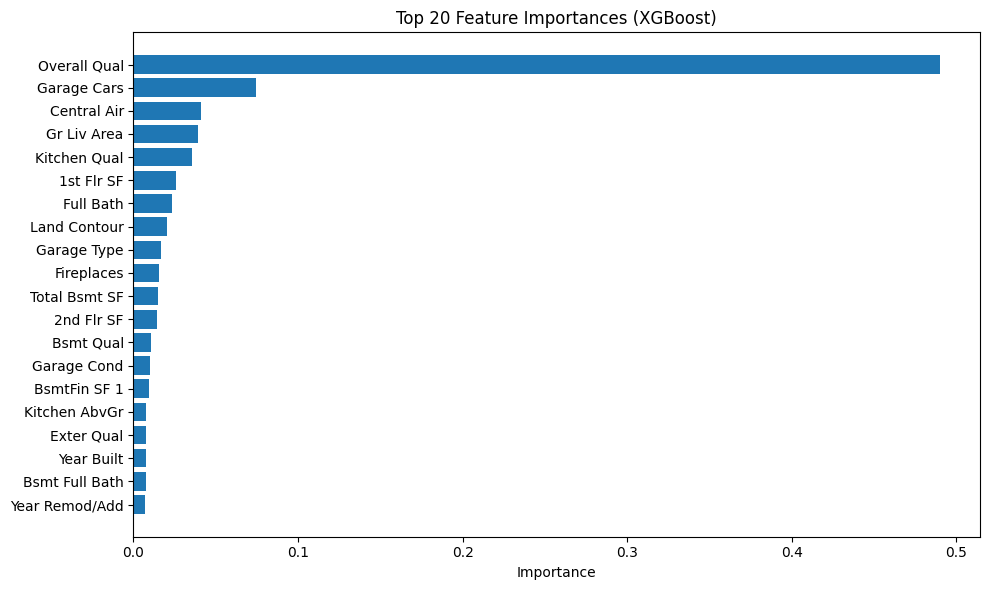

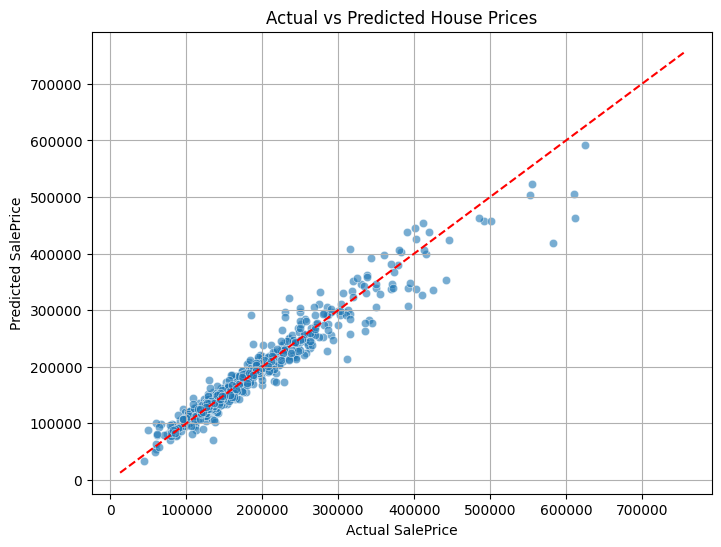

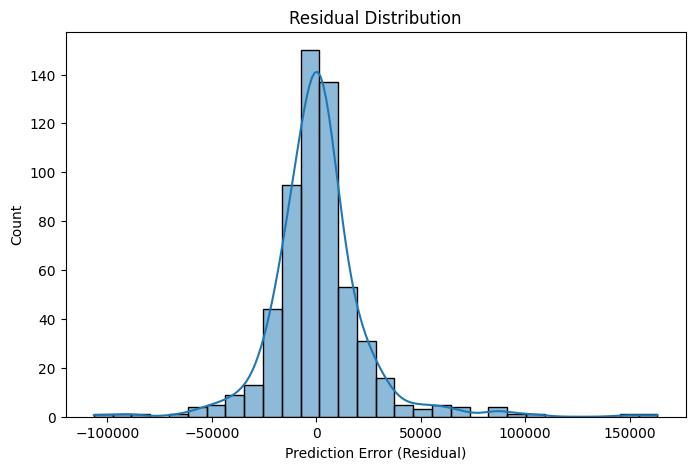

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# Load the Ames Housing dataset
url = "/content/AmesHousing.csv"
df = pd.read_csv(url)

# Display dataset shape and head
print("Dataset Shape:", df.shape)
print(df.head())

# Drop columns that are irrelevant or data leakage
df.drop(['Order', 'PID'], axis=1, inplace=True)

# Handle missing values and encode categorical variables
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna("Missing")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Fill numeric NaNs with median
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())

# Define features and target
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost Regressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# -----------------------------
# Plot 1: Feature Importance
plt.figure(figsize=(10, 6))
importance = model.feature_importances_
features = X.columns
indices = np.argsort(importance)[-20:]  # Top 20 features
plt.barh(range(len(indices)), importance[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title("Top 20 Feature Importances (XGBoost)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# -----------------------------
# Plot 2: Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

# -----------------------------
# Plot 3: Residuals Distribution
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Prediction Error (Residual)")
plt.show()
